## 나의 첫 모델 만들기

## 학습 내용
 * 1-1 데이터 불러오기
 * 1-2 데이터 탐색하기
 * 1-3 모델 만들고 제출해 보기

## 준비
 * 캐글 데이터 셋을 다운로드 받는다.(https://www.kaggle.com/c/2019-1st-ml-month-with-kakr/data)
 * 구글 Coloaboratory 확인
 * 구글 Coloaboratory에 데이터 올리기



In [1]:
from IPython.display import display, Image

## 1-1 데이터 불러오기

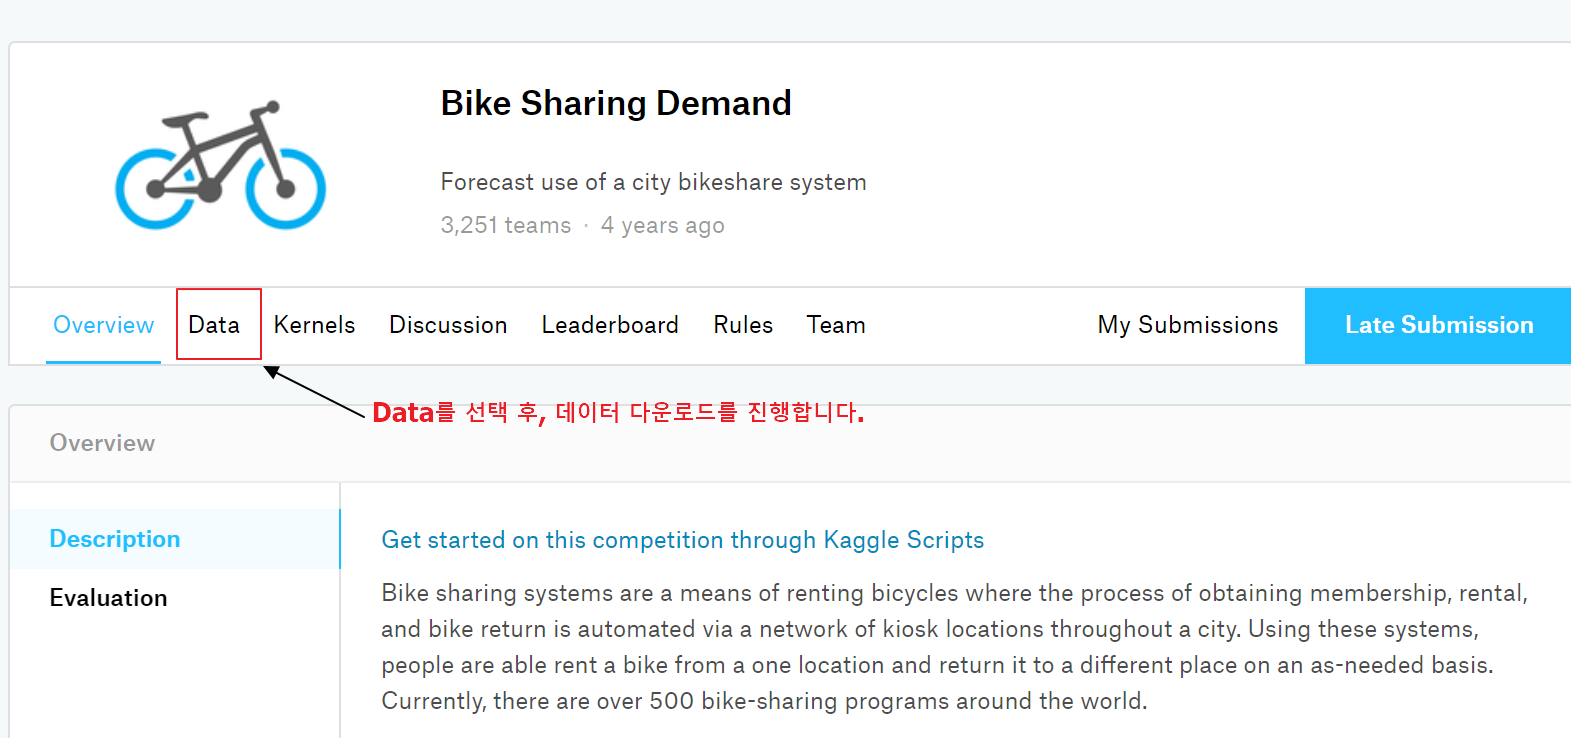

In [3]:
# 구글 Coloaboratory에 데이터를 올리고 불러온다.
display(Image(filename='../../img/kaggle/kaggle01.png'))

## Data Fields

구분 | 설명 | 값 |
-----|-----|-----|
**Survival** | 생존 여부  | Survival. 0 = No, 1 = Yes
**Pclass** | 티켓의 클래스 |Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
**Sex** | 성별(Sex) | 남(male)/여(female)
**Age** | 나이(Age in years.) | 
**SibSp** | 함께 탑승한 형제와 배우자의 수 /siblings,  spouses aboard the Titanic.  | 
**Parch** | 함께 탑승한 부모, 아이의 수  | # of parents / children aboard the Titanic.
**Ticket** | 티켓 번호(Ticket number) | (ex) CA 31352, A/5. 2151
**Fare** | 탑승료(Passenger fare) | 
**Cabin** | 객실 번호(Cabin number) | 
**Embarked** | 탑승 항구(Port of Embarkation) |  C = Cherbourg, Q = Queenstown, S = Southampton

* siblings : 형제, 자매, 형제, 의붓 형제
* spouses  : 남편, 아내 (정부와 약혼자는 무시)
* Parch : Parent(mother, father), child(daughter, son, stepdaughter, stepson)

In [6]:
import pandas as pd

In [7]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

## 1-2 데이터 탐색하기
 * 데이터의 행과 열( shape )
 * 컬럼명 확인
 * 각 컬럼의 자료형
 * 컬럼 결측치의 확인

In [8]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [9]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


* train에 Survived가 있고, test에는 없다.

In [10]:
train.dtypes   # int, object, float 형태의 자료형이 있다.

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Age와 Cabin에 결측치가 있다.

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* Age와 Cabin에 결측치가 있다.

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1-3 모델 만들고 제출해 보기
 * 모듈을 import(불러오기)을 이용하여 sklearn(Scikit-Learn)
 * 모델(로지스틱 회귀)을 생성 후, 학습(fit)
 * 그리고 예측(predict)을 수행 후, 제출한다.

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
# 데이터 준비 - 빠른 모델 생성을 위해 처리 없이 가능한 변수만 선택
# 'Survived'를 제외 , 
# 'Embarked', 'Sex'',Name', 'Ticket' =>문자포함
#  'Age',
sel = ['PassengerId', 'Pclass', 'SibSp', 'Parch' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [20]:
model = LogisticRegression()

In [21]:
# 학습
model.fit(X_train, y_train)

C:\Users\WJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 예측하기

In [22]:
predictions = model.predict(X_test)
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [24]:
sub = pd.read_csv("./titanic/gender_submission.csv")
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [25]:
sub['Survived'] = predictions
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [26]:
sub.to_csv("logistic_first_model.csv", index=False)

In [27]:
# test_passengerId = test['PassengerId']
# pred = predictions.astype(int)
# df_pred = pd.DataFrame({'PassengerID':test_passengerId, 'Survived':pred})
# df_pred.to_csv("logistic_first_model.csv", index=False)

### 제출 절차
 * https://www.kaggle.com/c/2019-1st-ml-month-with-kakr/data 에 접속 및 가입
 * 'Submit Predictions'을 선택 후, 해당 제출란에 생성된 *.csv 파일을 제출
 * 해당 제출 답에 대한 정확도를 확인


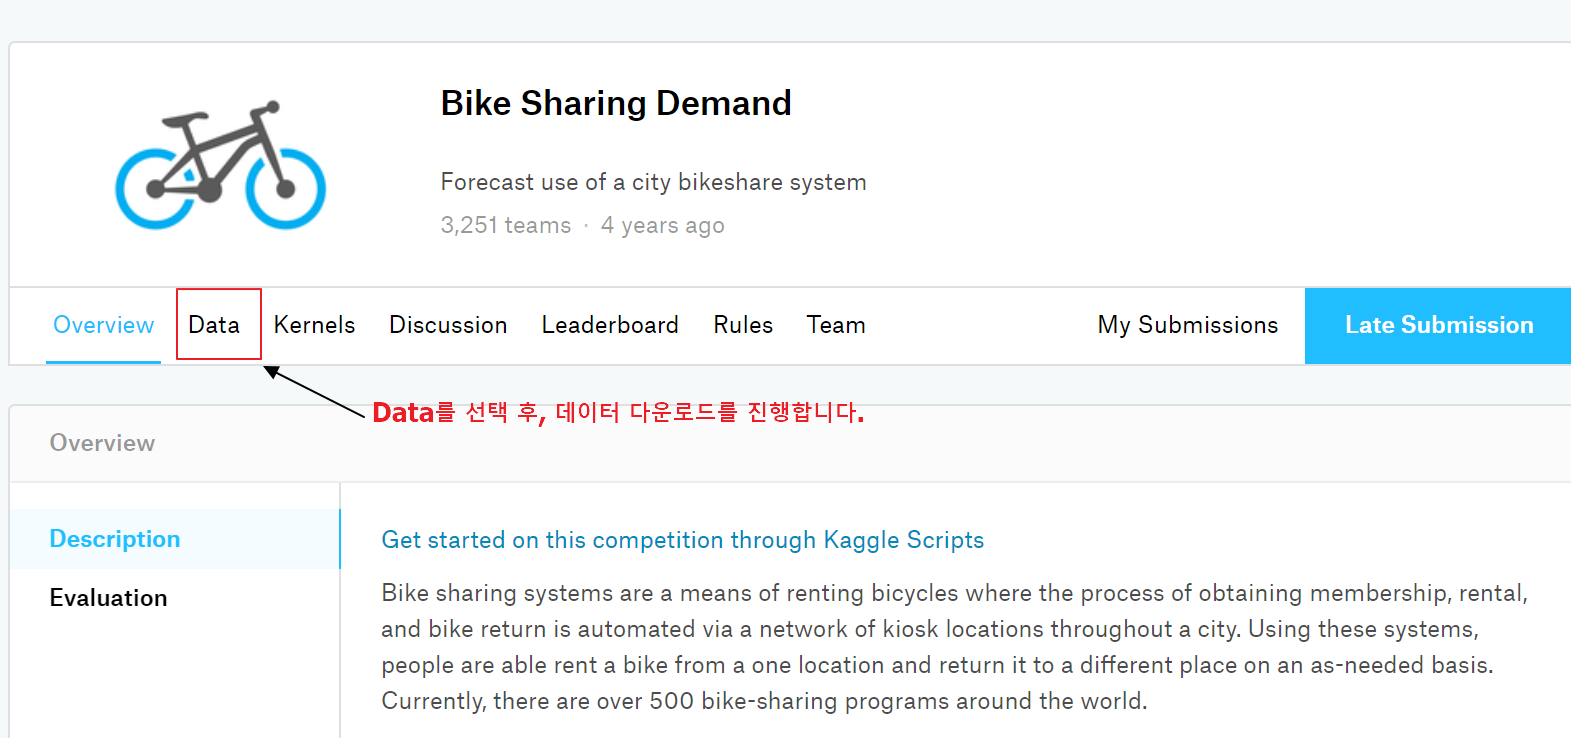

In [28]:
display(Image(filename='../../img/kaggle/kaggle01.png'))